<a href="https://colab.research.google.com/github/GregSym/Numberphile_Follow_Alongs/blob/spoon/NumberphileFollowAlongs_HitomezashiPatterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Numberphile Follow-Alongs

So I'm immediately breaking my rule that the videos must issue some sort of challenge because I thought the patterns looked cool - and if I must defend myself the visualisation is a bit of a challenge in and of itself

# Hitomezashi Stitch Patterns
## Dec 6, 2021
https://www.youtube.com/watch?v=JbfhzlMk2eY

## Before we go anywhere, getting from input arrays to some sort of abstraction for the whole generated grid pattern:

In [1]:
from __future__ import annotations

class HitomezashiRepr:
  """ An abstraction layer from the encoding of the pattern on the sides of the grid """
  def __init__(self, side_one: list[int], side_two: list[int], *args, **kwargs):
    self.side_one = side_one
    self.side_two = side_two
  
  def _vector_grid_general(self, index_side: list[int], magnitude_side: list[int]) -> dict[int, list[tuple[int, int]]]:
    """ returns vectors for either of 2 dimensions in the hitomezashi pattern
        - this means the vectors are naturally 1D vectors in either the x or y direction
    """
    vector_map: dict[int, list[tuple[int, int]]] = {}
    for index, bit in enumerate(index_side):
      vector_map[index] = []
      for index_value_pair, index_value_pair1 in zip(enumerate(magnitude_side), list(enumerate(magnitude_side))[1:]):
        if bit == 1:
          if index_value_pair[0]%2 == 0 and index_value_pair1[0]%2 == 1:
            vector_map[index].append((index_value_pair[0], index_value_pair1[0]))
        else:
          if index_value_pair[0]%2 == 1 and index_value_pair1[0]%2 == 0:
            vector_map[index].append((index_value_pair[0], index_value_pair1[0]))
    return vector_map
  
  @property
  def vector_grid_ltr(self) -> dict[int, list[tuple[int, int]]]:
    return self._vector_grid_general(index_side=self.side_one, magnitude_side=self.side_two)
  @property
  def vector_grid_btt(self) -> dict[int, list[tuple[int, int]]]:
    return self._vector_grid_general(index_side=self.side_two, magnitude_side=self.side_one)
  
  def _line_segments_general(self, 
                        grid_single_direction: dict[int, list[tuple[int, int]]]
                        ) -> dict[int, dict[int, tuple[tuple[int, int], tuple[int, int]]]]:  # typealias this maybe?
    """ returns segmented vectors in the format required by plt.Line2D -> (x1, x2), (y1, y2)
        - returns only one of the dimension tuples
    """
    return {index:{
        internal_index:
                vector
                 for internal_index, vector in enumerate(list_tuple)
                } for (index, list_tuple) in grid_single_direction.items()}

  @property
  def line_segments_ltr(self) -> dict[int, dict[int, tuple[tuple[int, int], tuple[int, int]]]]:  # typealias this maybe?
    return self._line_segments_general(grid_single_direction=self.vector_grid_ltr)
  @property
  def line_segments_btt(self) -> dict[int, dict[int, tuple[tuple[int, int], tuple[int, int]]]]:  # typealias this maybe?
    return self._line_segments_general(grid_single_direction=self.vector_grid_btt)
  

## Writing the visualiser for the pattern

I'm shadowing it with an interface in case I get around to anything other than matplotlib for this one

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import sys
if float(f"{sys.version_info[0]}.{sys.version_info[1]}") < 3.8:
  from typing_extensions import Protocol  # < 3.8 Protocol lives in a different package
else:
  from typing import Protocol

class _VisualiserInterfaceHitomezashi(Protocol):
  """ Interface for visualisation in this notebook """
  def __call__(self, pattern: HitomezashiRepr, verbose: bool) -> None:
      ...

def visualise_hitomezashi_pattern(pattern: HitomezashiRepr, verbose: bool = False):
  """ (pattern) -> visualisation of hitomezashi stitch pattern """
  def _plotting(line_segments: dict[int, dict[int, tuple[tuple[int, int], tuple[int, int]]]], direction: str = 'ltr'):
    for key, vector_dict in line_segments.items():
      for vector in vector_dict.values():
        plt.gca().add_line(
            plt.Line2D(xdata=vector, ydata=(key, key), linewidth=2.5)
            ) if direction == 'ltr' else plt.gca().add_line(
                plt.Line2D(xdata=(key, key), ydata=vector, linewidth=2.5))

  if verbose:
    print(pattern.vector_grid_ltr)
    print(pattern.vector_grid_btt)
    print(pattern.line_segments_ltr)
    print(pattern.line_segments_btt)
  plt.axes()
  _plotting(pattern.line_segments_ltr)
  _plotting(pattern.line_segments_btt, direction='btt')
  plt.axis('scaled')
  plt.show()  

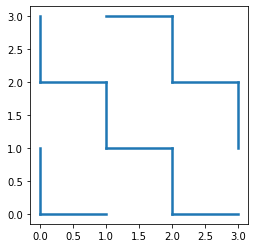

In [4]:
side_1: list[int] = [1, 0, 1, 0]
side_2: list[int] = [1, 0, 1, 0]

visualise_hitomezashi_pattern(pattern=HitomezashiRepr(side_one=side_1, side_two=side_2))

## Plotting random sequences

The next step is to scale up to plot a large random sequence

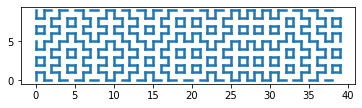

In [5]:
import random

side_one = [random.randint(0, 1) for _ in range(10)]
side_two = [random.randint(0, 1) for _ in range(40)]

visualise_hitomezashi_pattern(pattern=HitomezashiRepr(side_one=side_one, side_two=side_two))

It's probably useful to wrap this up and allow any combination of side length as a parameter

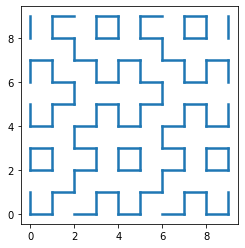

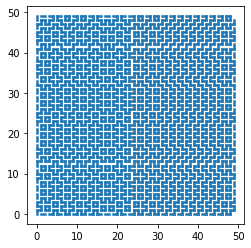

In [6]:
def visualise_for_given_side_length(xlength: int = 10, 
                                    ylength: int = 10, 
                                    visualiser: _VisualiserInterfaceHitomezashi = visualise_hitomezashi_pattern):
  """ Extending the random side generation to arbitrary side length """
  side_one = [random.randint(0, 1) for _ in range(ylength)]
  side_two = [random.randint(0, 1) for _ in range(xlength)]

  visualiser(pattern=HitomezashiRepr(side_one=side_one, side_two=side_two))

visualise_for_given_side_length()
visualise_for_given_side_length(xlength=50, ylength=50)

## And now I'm just gonna test the two colourability statement, as you do

I'm sure that's not going to require me to double the amount of working matplotlib knowledge I have on hand...

So, as an astute YouTube commenter pointed out, the key to the easiest version of the proof is to look at the line intersections.

Assuming triple colourable requires, as a condition, a vertex of 3 line segments, with two colourability likewise hinging on a 2 line segment vertex, the goal is to show that each vertex will only ever have an intersection of two lines.

This relies on the fact that the period of the pattern is not simply a line segment, but rather a line segment followed by a blank space. For example, let's focus on a zoomed in section of the pattern: 

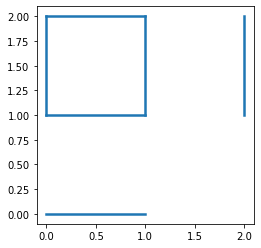

In [8]:
side_one = [1, 1, 1]
side_two = [0, 0, 0]

visualise_hitomezashi_pattern(pattern=HitomezashiRepr(side_one=side_one, side_two=side_two))

It's also useful that the full period of the 1D sequence can be contained in this two by two grid, with the centre point able to display every possible variety of intersection, meaning this can be proved by a brute force observation:

In [9]:
every_binary_number_length_3: list[list[int]] = [
                                                 [0, 0, 0], [0, 0, 1], [0, 1, 0],
                                                 [0, 1, 1], [1, 0, 0], [1, 0, 1],
                                                 [1, 1, 0], [1, 1, 1]
]

def brute_force_demo_every_intersection(visualiser: _VisualiserInterfaceHitomezashi = visualise_hitomezashi_pattern):
  for side_one in every_binary_number_length_3:
    for side_two in every_binary_number_length_3:
      visualiser(pattern=HitomezashiRepr(side_one=side_one, side_two=side_two))

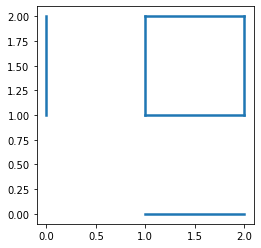

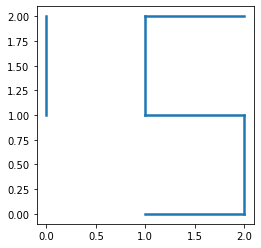

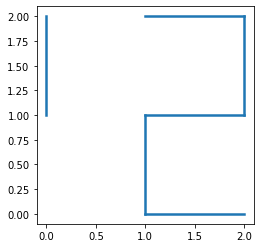

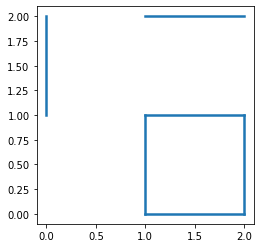

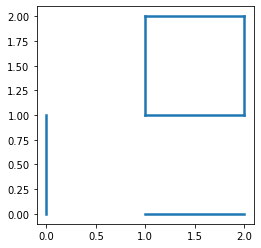

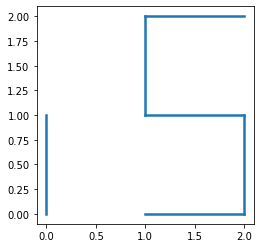

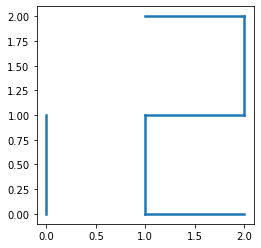

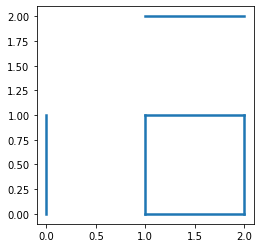

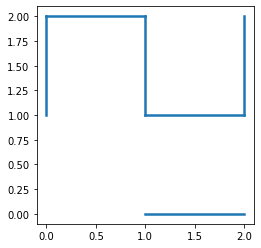

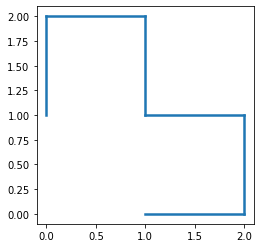

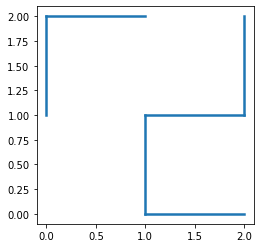

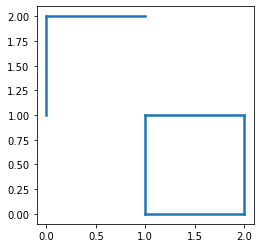

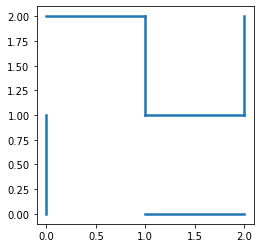

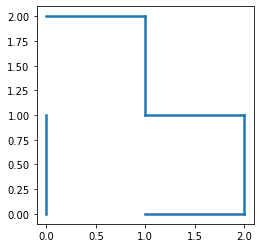

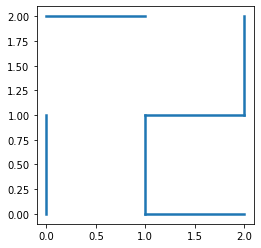

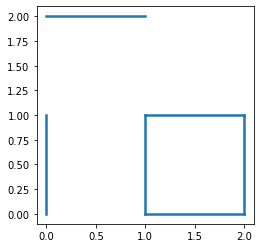

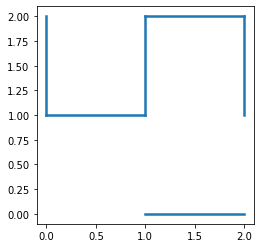

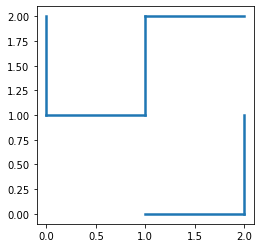

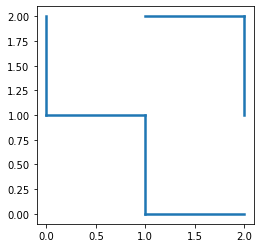

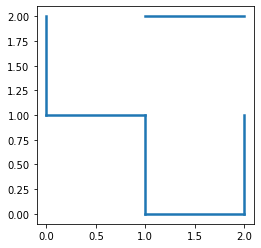

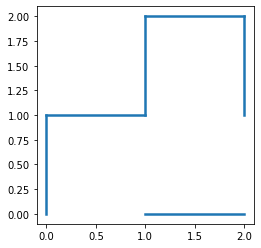

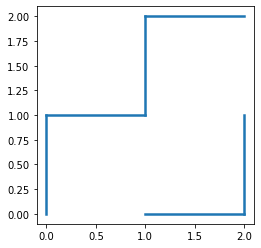

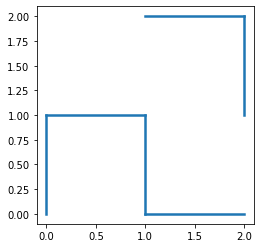

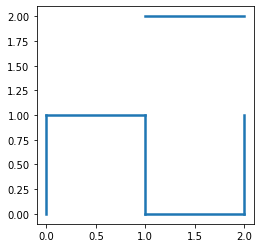

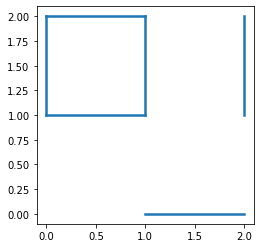

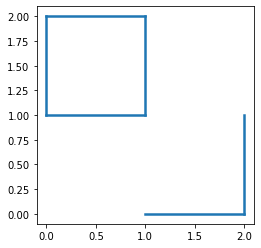

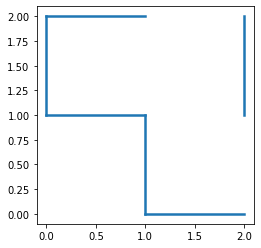

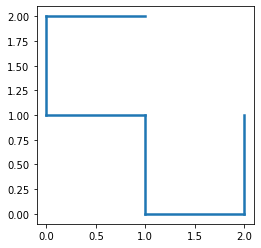

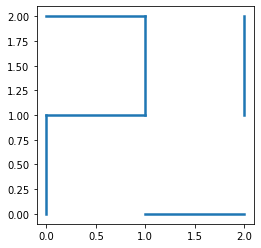

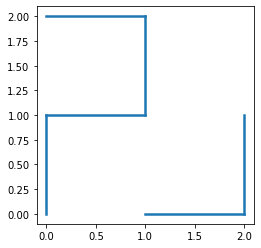

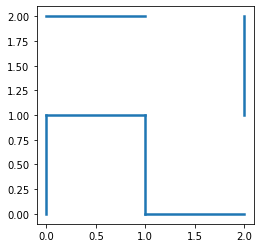

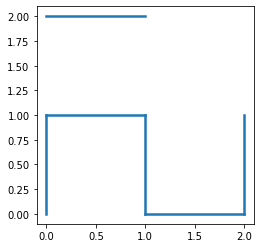

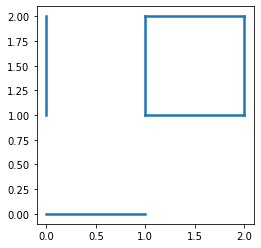

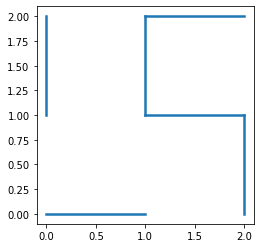

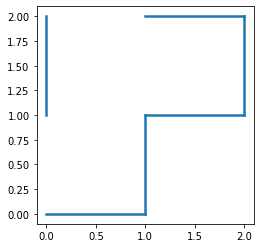

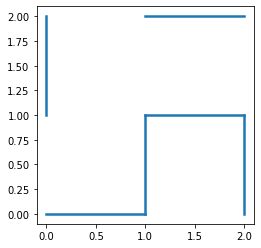

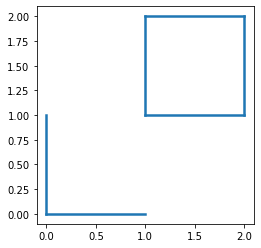

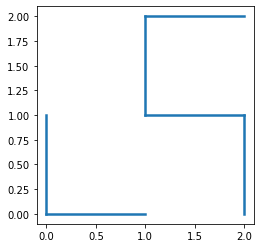

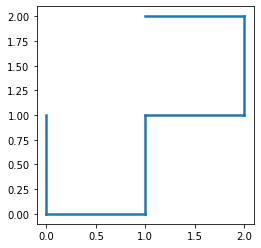

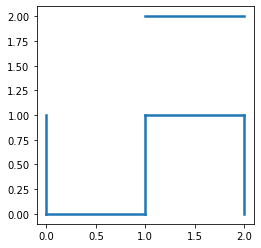

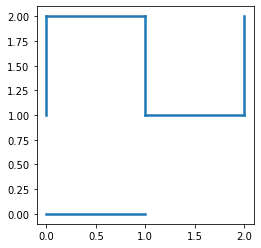

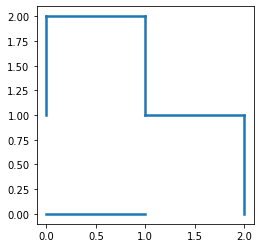

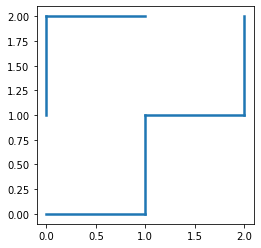

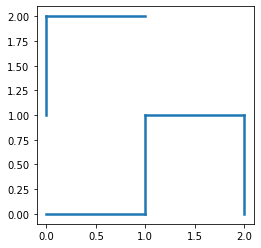

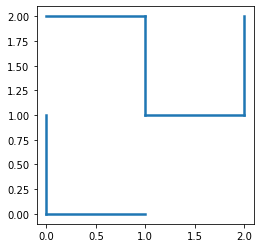

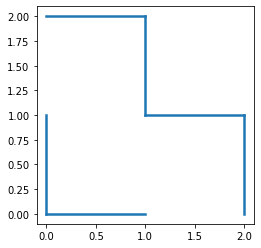

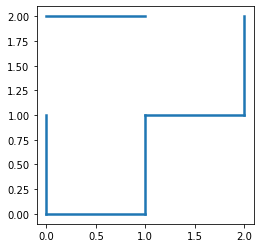

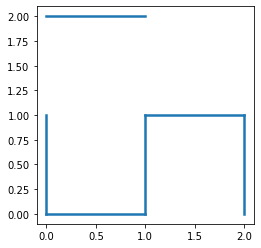

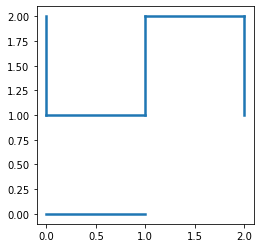

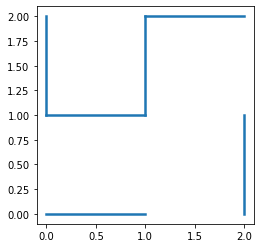

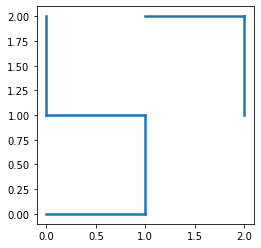

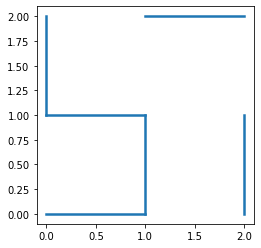

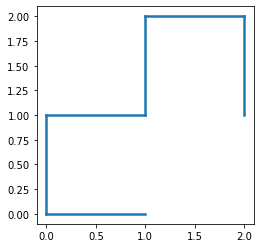

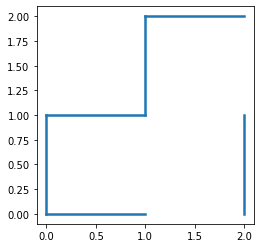

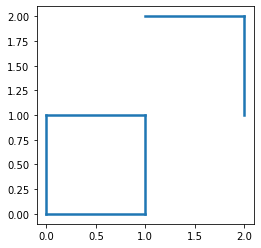

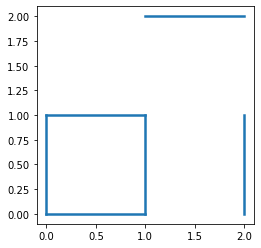

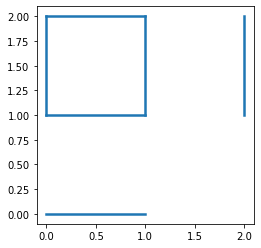

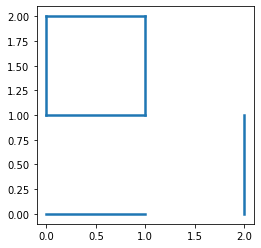

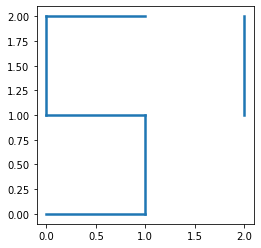

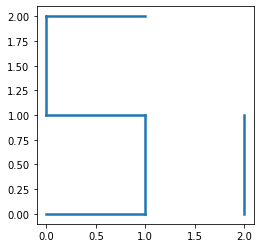

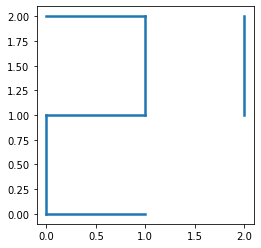

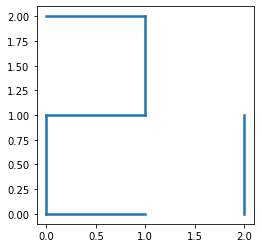

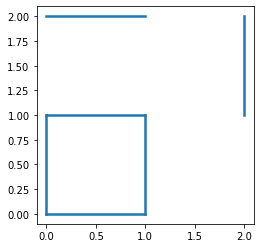

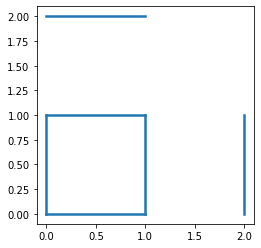

In [10]:
brute_force_demo_every_intersection()

And, as noted in this somewhat extraneous list, no possible intersection allowed by the pattern's rules possesses an intersection of anything other than two line segments

## So I should probably write a visualiser that demonstrates the two colourability then, huh?